# Detecção de Fraudes em Transações Financeiras

Este projeto visa identificar transações financeiras fraudulentas usando um conjunto de dados simulado.

## Estrutura do Projeto

O projeto segue o seguinte pipeline:
1. Definição do Problema
2. Coleta dos Dados
3. Limpeza e Tratamento dos Dados
4. Análise Exploratória
5. Modelagem dos Dados
6. Aplicação dos Modelos de ML
7. Interpretação dos Dados
8. Aplicando Melhorias



---



# 1 - Definição do Problema

- O problema é a detecção de fraudes em transações financeiras.
- Objetivo: Identificar transações fraudulentas usando dados simulados do PaySim.

# 2 - Coleta dos Dados
- Dados de exemplo disponíveis no arquivo CSV: 'fraud_dataset_example.csv'

In [139]:
import pandas as pd

df = pd.read_csv('/content/fraud_dataset_example.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# 3 - Limpeza e Tratamento dos Dados


In [140]:
# Seleção das colunas relevantes
df = df[['isFraud','isFlaggedFraud','step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest' ]]

In [141]:
# Renomear colunas para português
colunas = {
    'isFraud': 'fraude',
    'isFlaggedFraud':'super_fraude',
    'step':'tempo',
    'type':'tipo',
    'amount':'valor',
    'nameOrig':'cliente1',
    'oldbalanceOrg':'saldo_inicial_c1',
    'newbalanceOrig':'novo_saldo_c1',
    'nameDest':'cliente2',
    'oldbalanceDest':'saldo_inicial_c2',
    'newbalanceDest':'novo_saldo_c2',
}

df = df.rename(columns = colunas)
df.head()

,fraude,super_fraude,tempo,tipo,valor,cliente1,saldo_inicial_c1,novo_saldo_c1,cliente2,saldo_inicial_c2,novo_saldo_c2
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


In [142]:
# Verificação do tamanho do dataframe
df.shape

(101613, 11)

# 4 - Análise Exploratória  (EDA)


In [143]:
# Descrição estatística das colunas de maneira transposta
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fraude,101613.0,1.141586e-03,3.376824e-02,0.00,0.00,0.00,0.00,1.00
super_fraude,101613.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00
tempo,101613.0,8.523457e+00,1.820681e+00,1.00,8.00,9.00,10.00,10.00
valor,101613.0,1.740901e+05,3.450199e+05,0.32,10016.59,53385.41,212498.40,10000000.00
saldo_inicial_c1,101613.0,9.071753e+05,2.829575e+06,0.00,0.00,20190.47,194715.00,38939424.03
novo_saldo_c1,101613.0,9.234992e+05,2.867319e+06,0.00,0.00,0.00,219217.76,38946233.02
saldo_inicial_c2,101613.0,8.810428e+05,2.399949e+06,0.00,0.00,21058.00,591921.70,34008736.98
novo_saldo_c2,101613.0,1.183998e+06,2.797761e+06,0.00,0.00,51783.43,1063121.64,38946233.02


In [144]:
# Informações sobre o dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fraude            101613 non-null  int64  
 1   super_fraude      101613 non-null  int64  
 2   tempo             101613 non-null  int64  
 3   tipo              101613 non-null  object 
 4   valor             101613 non-null  float64
 5   cliente1          101613 non-null  object 
 6   saldo_inicial_c1  101613 non-null  float64
 7   novo_saldo_c1     101613 non-null  float64
 8   cliente2          101613 non-null  object 
 9   saldo_inicial_c2  101613 non-null  float64
 10  novo_saldo_c2     101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB
None


In [145]:
# Verificar a variável alvo(target)
df.groupby('fraude').tempo.count()

fraude
0    101497
1       116
Name: tempo, dtype: int64

In [146]:
# Verificar valores nulos
df.isnull().values.any()

False

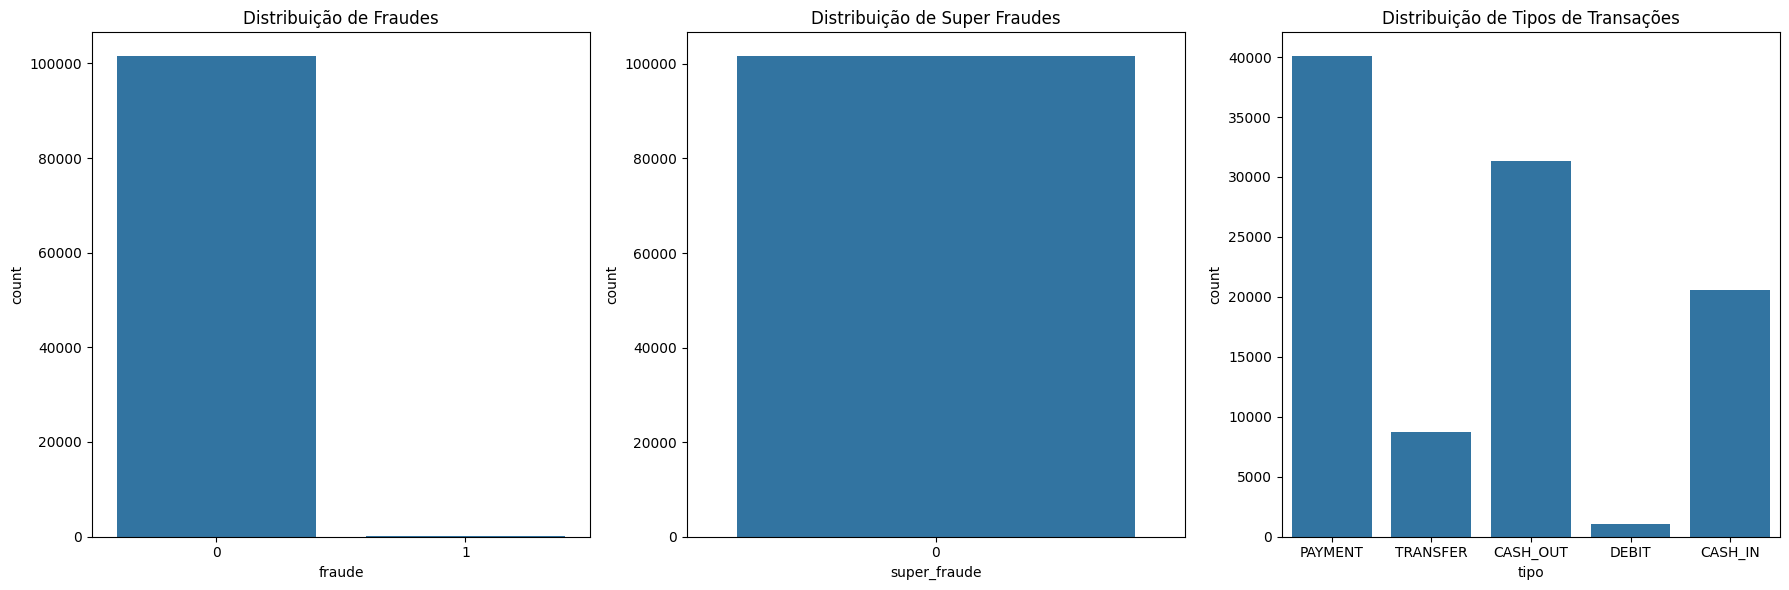

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definindo a figura e os eixos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de fraude
sns.countplot(ax=axes[0], x='fraude', data=df)
axes[0].set_title('Distribuição de Fraudes')

# Gráfico de super_fraude
sns.countplot(ax=axes[1], x='super_fraude', data=df)
axes[1].set_title('Distribuição de Super Fraudes')

# Gráfico de tipo
sns.countplot(ax=axes[2], x='tipo', data=df)
axes[2].set_title('Distribuição de Tipos de Transações')

# Ajustando o layout
plt.tight_layout()
plt.show()


In [148]:
# Análises primárias

## No gráfico 1, vemos que á um desbalanceamento dos registros, podendo prejudicar na criação dos modelos de ML. Será necessário a realização de um oversampling;
## A coluna de super fraude pode ser descartada, logo que não há nenhum indício de problema da parte dela;

In [149]:
# 5. Modelagem dos Dados
# Encoding das variáveis categóricas

# 5 - Modelagem dos Dados

## Encoding das variáveis categóricas

### **Tipos de enconding:**



*   **Label Enconding:**  Renomea as classes com valores numéricos de 1 a **n**, sendo n o número de classes. Pode existir hierarquia entre as classes
*   **One-Hot Enconding**: Transforma as variáveis em **n** colunas binárias, sendo n o número de classes. Todas as classes são analisadas de forma igual, quando tiver a ocorrência dela a coluna tera o valor 1 e quando não, o valor 0. Isso acontece para as demais colunas criadas





In [150]:
# Encoding das variáveis categóricas utilizando o dummies
df = pd.get_dummies(data=df, columns=['tipo'])
df.head()

,fraude,super_fraude,tempo,valor,cliente1,saldo_inicial_c1,novo_saldo_c1,cliente2,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,False,False,False,True,False
1,0,0,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,False,False,False,True,False
2,1,0,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,False,False,False,False,True
3,1,0,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,False,True,False,False,False
4,0,0,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,False,False,False,True,False


In [151]:
# Remover colunas que não ajudarão no processo
df = df.drop(['cliente1', 'cliente2', 'super_fraude'], axis = 1)

In [152]:
from sklearn.model_selection import train_test_split
x = df.drop('fraude', axis=1)
y = df['fraude']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Balanceamento dos Dados

In [153]:
from imblearn.over_sampling import SMOTE
import numpy as np

SEED=42

smote = SMOTE(random_state=42)

In [154]:
x = df.drop('fraude', axis=1)
y = df['fraude']


x_resampled, y_resampled = smote.fit_resample(x,y)

In [155]:
df_balanced = pd.concat([y_resampled, x_resampled], axis=1)
df_balanced

,fraude,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,1,9839.640000,170136.000000,160296.36,0.000000,0.000000,False,False,False,True,False
1,0,1,1864.280000,21249.000000,19384.72,0.000000,0.000000,False,False,False,True,False
2,1,1,181.000000,181.000000,0.00,0.000000,0.000000,False,False,False,False,True
3,1,1,181.000000,181.000000,0.00,21182.000000,0.000000,False,True,False,False,False
4,0,1,11668.140000,41554.000000,29885.86,0.000000,0.000000,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
202989,1,5,17608.962863,17608.962863,0.00,0.000000,0.000000,False,False,False,False,True
202990,1,7,12116.291013,12116.291013,0.00,0.000000,0.000000,False,False,False,False,True
202991,1,1,231612.880715,231612.880715,0.00,1945.589357,9370.603471,False,True,False,False,True
202992,1,9,547325.144758,547325.144758,0.00,0.000000,0.000000,False,False,False,False,True


In [156]:
df_balanced.groupby('fraude').tempo.count()

fraude
0    101497
1    101497
Name: tempo, dtype: int64

In [157]:
x = df_balanced.iloc[:, 1:].values
y = df_balanced.iloc[:, 0].values

# 6 - Aplicação dos Modelos de ML

## Regressão Logística

In [158]:
from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = SEED)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(max_iter=1000, random_state=SEED)

lr.fit(x_train, y_train)
y_pred =lr.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9417722516699837
Precisão: 0.9241993556945234
Recall: 0.9623125493291239
F1: 0.9428709521507975


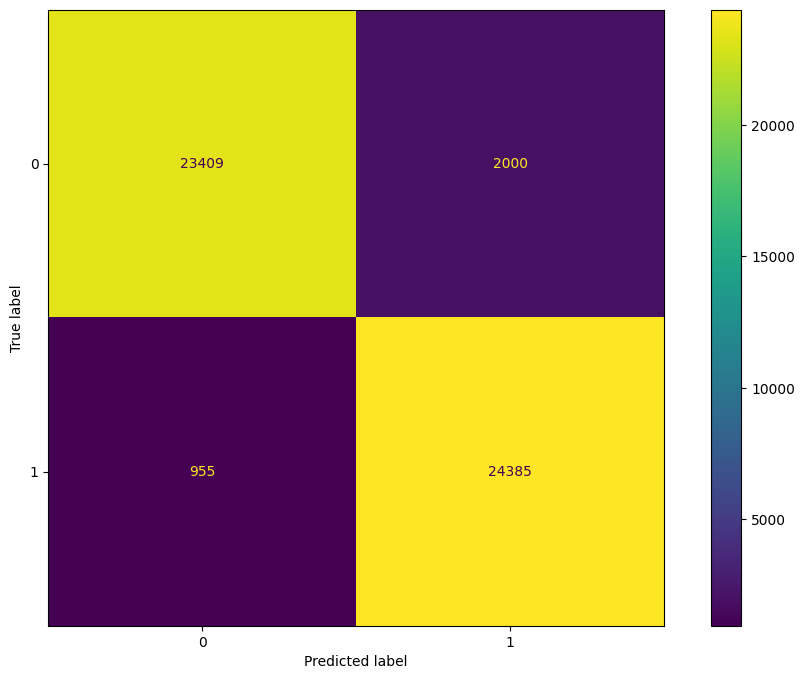

In [159]:
## Plotando matriz de confusão para entendimento das métricas
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

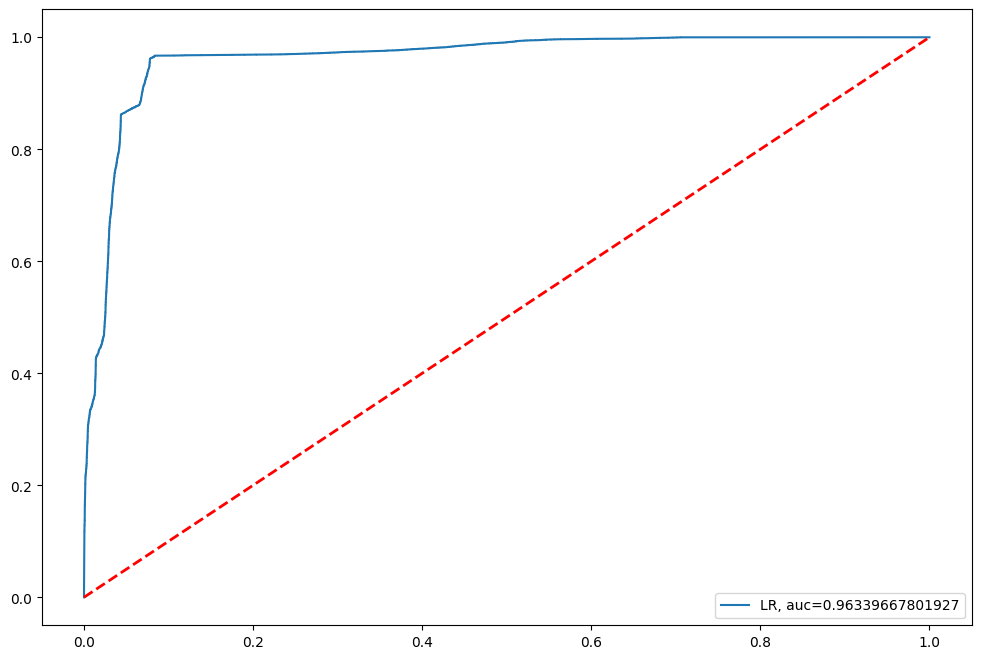

In [160]:
y_pred_proba = lr.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)


## Árvore de Decisão (Decision Tree)

In [161]:
from sklearn.tree import DecisionTreeClassifier

dt =  DecisionTreeClassifier(max_depth = 5, random_state=SEED)

model = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))


Acurácia: 0.9595065912628821
Precisão: 0.9379678742053192
Recall: 0.9839779005524862
F1: 0.9604221635883906


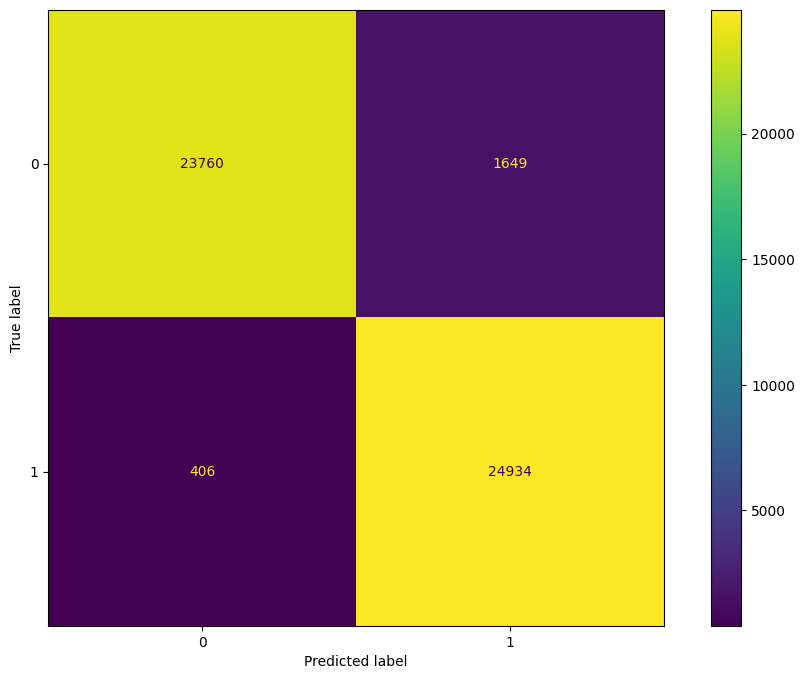

In [162]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

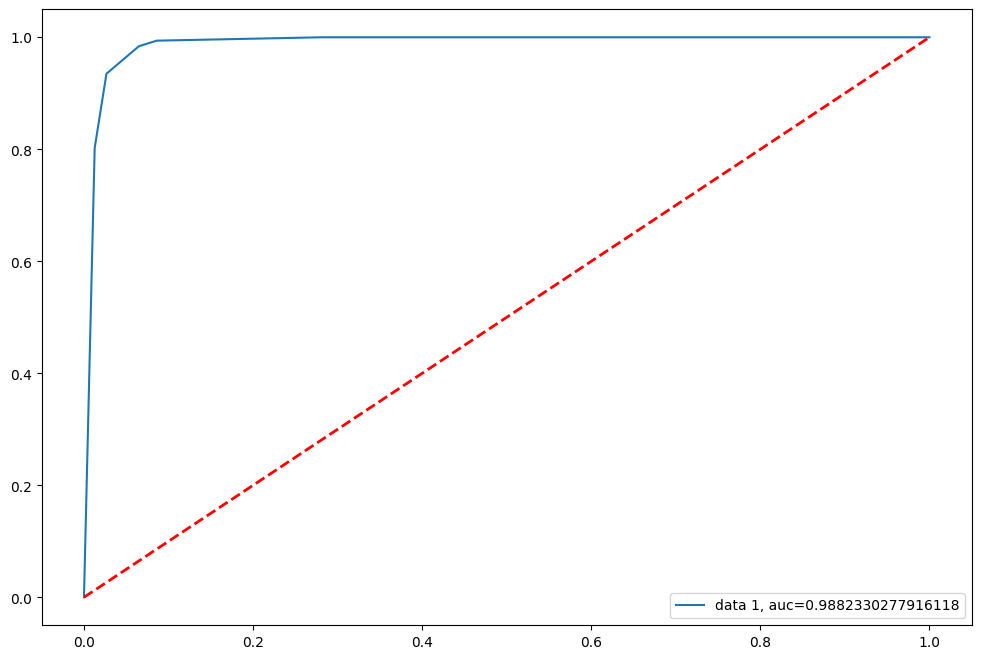

In [163]:
y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

## Random Forest


In [164]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth= 5, random_state = SEED)

model = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

model = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9722950205915387
Precisão: 0.9787182974637971
Recall: 0.9655090765588004
F1: 0.9720688148118718


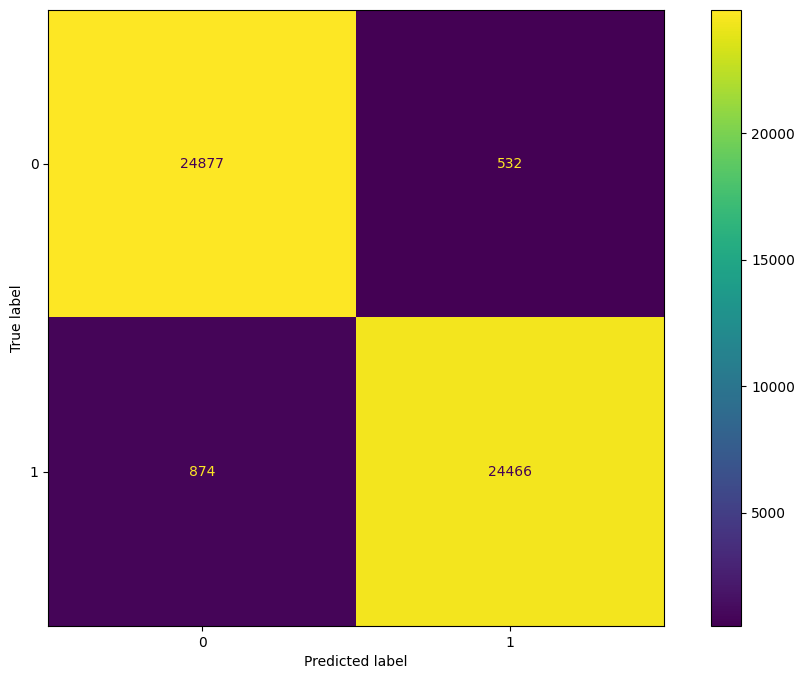

In [165]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

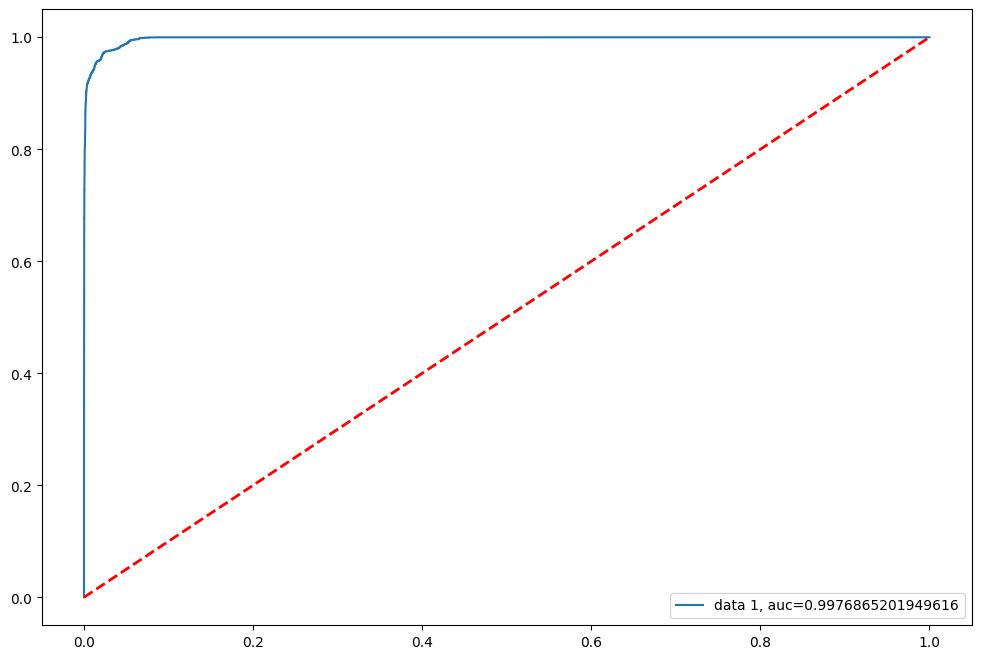

In [166]:
y_pred_proba =  rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

# 7 - Interpretação dos Dados

## Análise de métricas

In [167]:
classifiers = [
    LogisticRegression(max_iter=1000, random_state=SEED),
    DecisionTreeClassifier(max_depth = 5, random_state=SEED),
    RandomForestClassifier(max_depth= 5, random_state = SEED)]


LogisticRegression
****Resultados****
Accuracy: 0.9417722516699837
Precision: 0.9241993556945234
Recall: 0.9623125493291239
F1: 0.9428709521507975
DecisionTreeClassifier
****Resultados****
Accuracy: 0.9595065912628821
Precision: 0.9379678742053192
Recall: 0.9839779005524862
F1: 0.9604221635883906
RandomForestClassifier
****Resultados****
Accuracy: 0.9722950205915387
Precision: 0.9787182974637971
Recall: 0.9655090765588004
F1: 0.9720688148118718


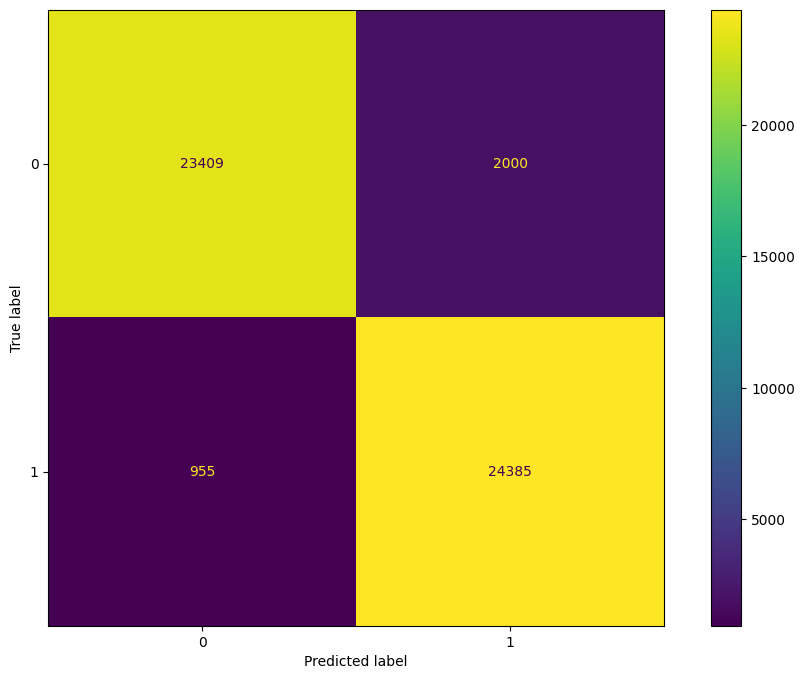

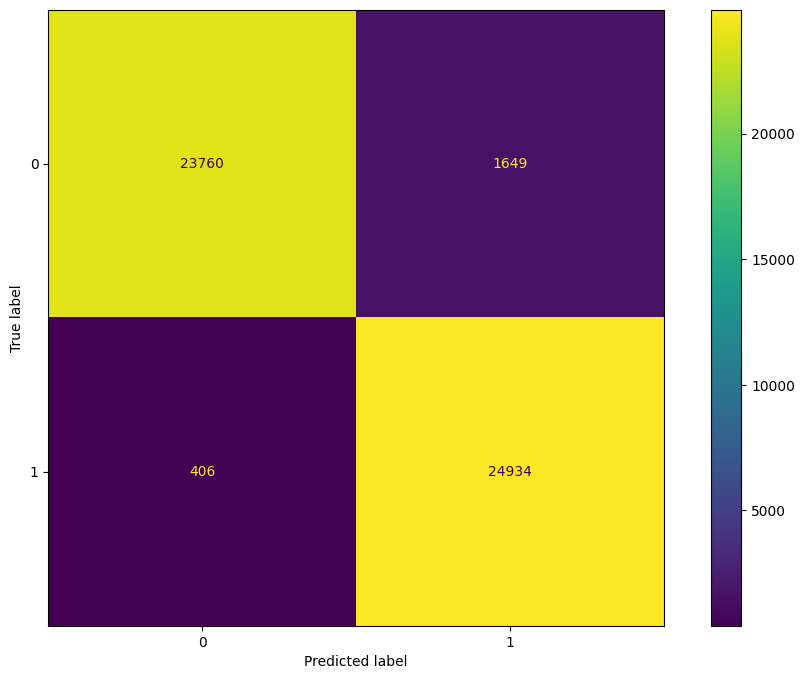

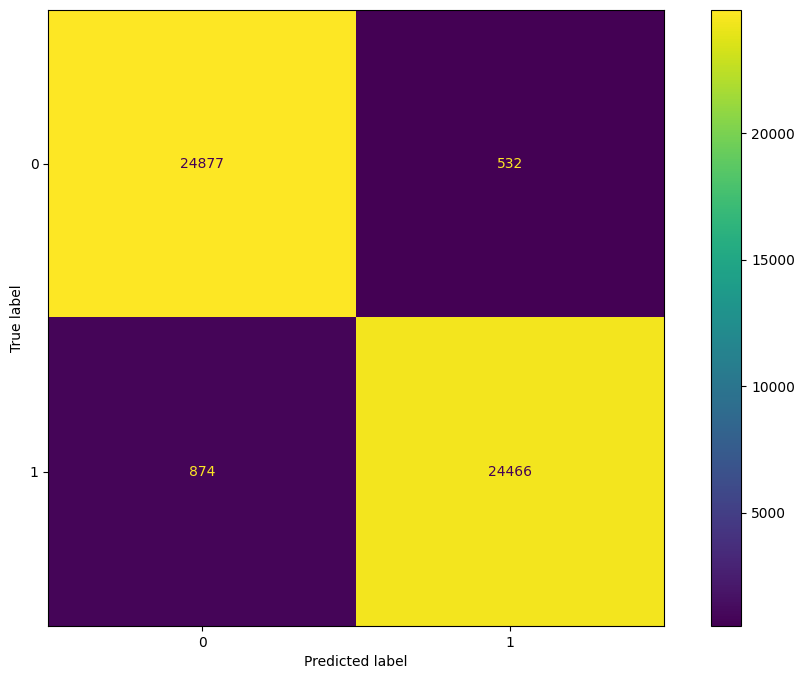

In [168]:
for clf in classifiers:
  clf.fit(x_train, y_train)
  name = clf.__class__.__name__
  print("="*30)
  print(name)
  print('****Resultados****')
  y_pred = clf.predict(x_test)
  print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
  print("Precision:", metrics.precision_score(y_test, y_pred))
  print("Recall:", metrics.recall_score(y_test, y_pred))
  print("F1:", metrics.f1_score(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()



Hipóteses levantadas sobre os problemas:

- tipo_PAYMENT é o que a pessoa utiliza como padrão e a fraude ocorre por meio do tipo_TRANSFER
- O cliente pode fazer seus pagamentos durante um período do dia, como por exemplo durante a manhã, e a fraude ocorre durante um período diferente, como a madrugada.
- O cliente paga as duas contas no começo do mês e houve uma movimentação no final do mês, sendo uma fraude.


# 8 - Aplicando Melhorias

Neste ponto, podemos realizar tuning de hiperparâmetros, usar diferentes algoritmos, ou outras técnicas para melhorar a performance do modelo.


In [169]:
n_estimators = np.arange(20, 200, step=20)

In [170]:
n_estimators = np.arange(20, 200, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(2, 10, step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


In [171]:
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}



In [172]:
from sklearn.model_selection import RandomizedSearchCV

SEED = 70

rforest = RandomForestClassifier(random_state=SEED)

In [173]:
random_cv = RandomizedSearchCV(
    rforest, param_grid, n_iter=5, cv=3, scoring="recall", n_jobs=-1, random_state = SEED
)


In [174]:
%%time
rcv = random_cv.fit(x, y)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


CPU times: user 39.3 s, sys: 555 ms, total: 39.8 s
Wall time: 3min 48s


In [176]:
print(f"Best parameters: {rcv.best_params_}")

Best parameters: {'n_estimators': 120, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 9, 'criterion': 'gini', 'bootstrap': False}


# 9 - Resultados finais e Conclusão

## Resultados Finais

In [177]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state = SEED)

model = rfn.fit(x_train, y_train)
y_pred = rfn.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Acurácia: 0.9917633845001872
Precisão: 0.9907451165721487
Recall: 0.9927782162588792
F1: 0.9917606244579357


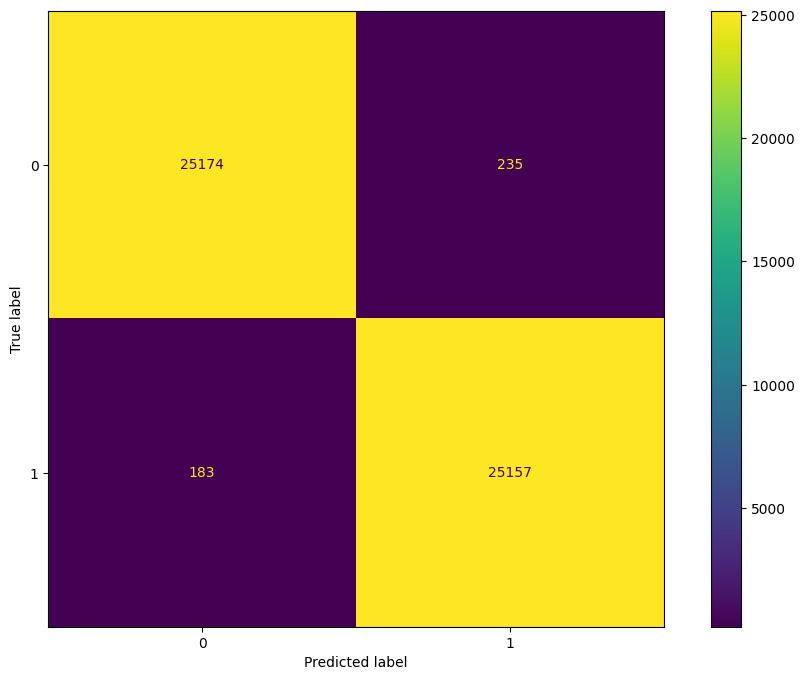

In [178]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Conclusão

Hipóteses levantadas anteriormente:

- tipo_PAYMENT é o que a pessoa utiliza como padrão e a fraude ocorre por meio do tipo_TRANSFER

- O cliente pode fazer seus pagamentos durante um período do dia, como por exemplo durante a manhã, e a fraude ocorre durante um período diferente, como a madrugada.

- O cliente paga as duas contas no comoeço do mês e houve uma movimentação no final do mês, sendo uma fraude.



---



Soluções das Hipóteses:

• O(a) cliente tem um certo padrão de movimentação do dinheiro, em horário comercial, e a fraude ocorreu fora deste horário, como por exemplo durante a madrugada.

• Ainda em relação ao tempo, o cliente pode fazer suas principais movimentações em um período inicial do mês e a fraude foi vista em um dia não habitual.

  `- Fazer um CAPTCHA para aumentar a segurança em horários não convencionais.`

• O(a) cliente utiliza como padrão o pagamento em dinheiro, seja por PIX ou retirada*, e a fraude pode ocorrer por um pagamento por transferência.

`  - Solicitar uma verificação de informação adicional do banco, como uma pergunta de segurança, para movimentações de transferência.`